<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/tf_probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import seaborn as sns

In [ ]:
normal = tfp.distributions.Normal(loc=0., scale=1.)
print(normal)

tfp.distributions.Normal("Normal", batch_shape=[], event_shape=[], dtype=float32)


<ipython-input-3-906e261d4646>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(samples)


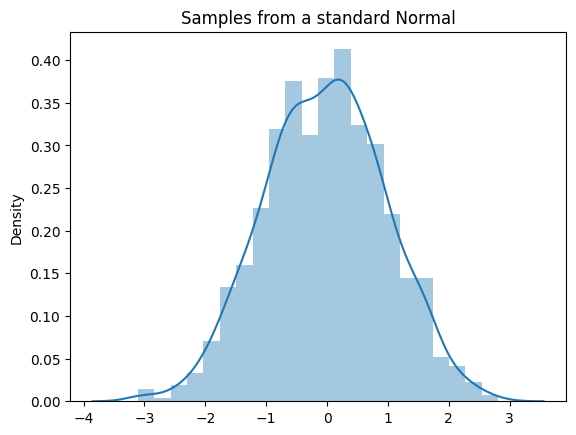

In [ ]:
# Plot 1000 samples from a standard normal
samples = normal.sample(1000)
sns.distplot(samples)
plt.title("Samples from a standard Normal")
plt.show()

In [ ]:
# Compute the log_prob of a point in the event space of `normal`
normal.log_prob(1000)

<tf.Tensor: shape=(), dtype=float32, numpy=-500000.9>

In [ ]:
for_normal = tfp.distributions.Normal(loc=[0., 1., 2., 3.], scale=[[1.], [5.]],
               name='Broadcasting Scale')
for_normal

<tfp.distributions.Normal 'Broadcasting_Scale' batch_shape=[2, 4] event_shape=[] dtype=float32>

<ipython-input-11-81dbcf945aff>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(samples_for)


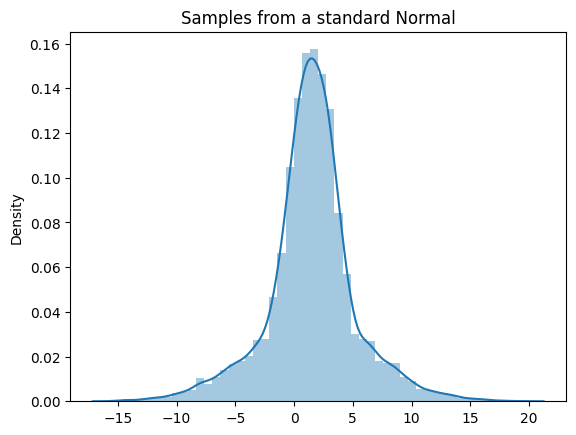

In [ ]:
# Plot 1000 samples from a standard normal
samples_for = for_normal.sample(1000)
sns.distplot(samples_for)
plt.title("Samples from a standard Normal")
plt.show()

In [ ]:
for_normal.sample(2)

<tf.Tensor: shape=(2, 2, 4), dtype=float32, numpy=
array([[[ 0.46765336,  2.3141522 ,  2.638747  ,  3.3338218 ],
        [-7.3067327 ,  1.1402811 , 13.252841  ,  5.373501  ]],

       [[ 0.41530198, -0.12483561,  2.4442968 ,  3.1088157 ],
        [-4.644252  , -3.101902  ,  8.427507  ,  9.035152  ]]],
      dtype=float32)>

In [ ]:
tfd = tfp.distributions
n = tfd.Normal(loc=5., scale=1.)
n

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

In [ ]:
n.sample(10)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([3.7961917, 3.6678374, 5.0508146, 4.884166 , 4.181427 , 4.968402 ,
       4.3276496, 6.4607797, 4.7184954, 3.8086586], dtype=float32)>

In [ ]:
n.log_prob(n.sample(10))

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-1.3126361 , -1.00298   , -0.944144  , -0.97831035, -1.0478084 ,
       -0.9401353 , -2.5137978 , -1.1824982 , -0.91897416, -1.5515772 ],
      dtype=float32)>

In [ ]:
n.log_prob(5.4)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.99893856>

In [ ]:
import tensorflow_probability as tfp

tfd = tfp.distributions
n = tfd.Normal(loc=5., scale=1.)

# Вычисляем логарифмическую вероятность для значения 5
log_prob_5 = n.log_prob(5)

# Экспоненцируем логарифмическую вероятность, чтобы получить реальную вероятность
prob_5 = tf.math.exp(log_prob_5)

print("Логарифмическая вероятность для значения 5:", log_prob_5.numpy())
print("Реальная вероятность для значения 5:", prob_5.numpy())

Логарифмическая вероятность для значения 5: -0.9189385
Реальная вероятность для значения 5: 0.3989423


/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


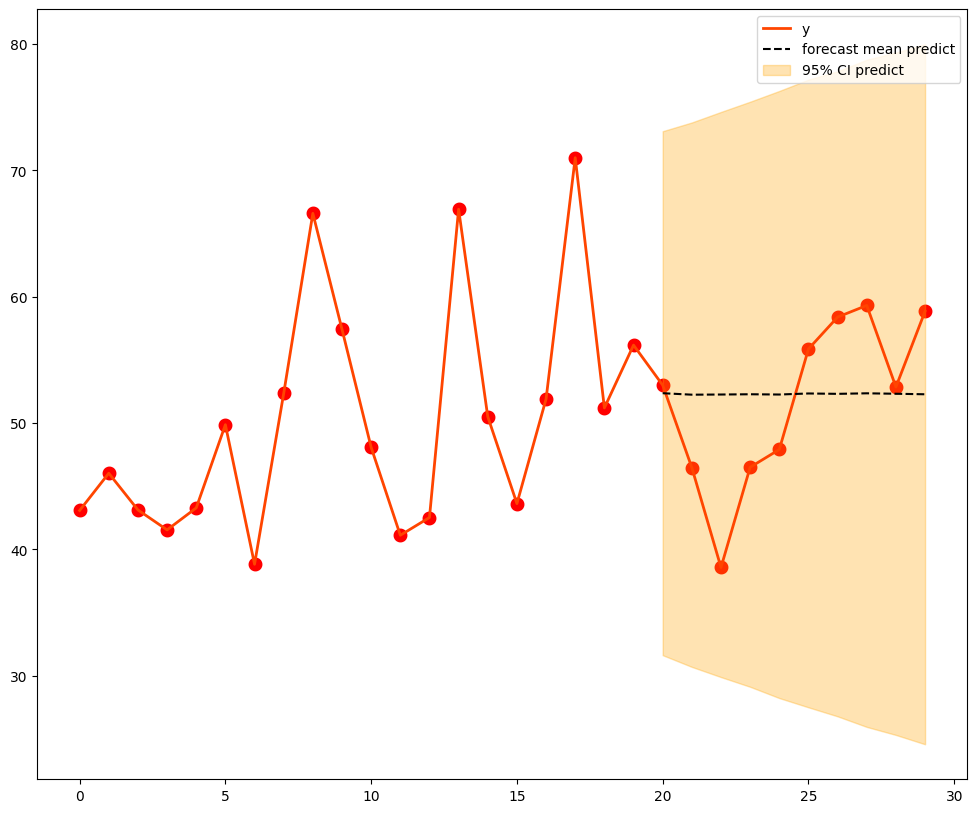

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
import tensorflow as tf
np.random.seed(1)
x = np.random.normal(2000,200,30)#np.random.rand(30)
y = np.random.normal(50,10,30) #2.2 * x + np.random.rand(30)
data = pd.DataFrame({'X': x, 'y': y}, dtype=np.float32)
obs_data = data['y'].iloc[:20]

level = tfp.sts.LocalLevel(observed_time_series=obs_data) # y_train 20
linear = tfp.sts.LinearRegression(design_matrix=data['X'].values[:, np.newaxis]) #X_all 30
model = tfp.sts.Sum([level, linear], observed_time_series=obs_data) #train_y 20

samples, _ = tfp.sts.fit_with_hmc(model, obs_data,num_results=500,num_warmup_steps=100,variational_optimizer=None) #train_y 20

dist = tfp.sts.forecast(model, obs_data, samples, 10)
mean, std = dist.mean(), dist.stddev()

fig = plt.figure(figsize=(12, 10))
ax = plt.subplot(1, 1 ,1)
# ax.plot(np.arange(30), data['X'], label='X', lw=1)
ax.plot(np.arange(30), data['y'], label='y', lw=2, color='orangered')
ax.scatter(np.arange(30), data['y'], lw=4, color='red')
ax.plot(np.arange(20, 30), mean, color='k', ls='--', label='forecast mean predict')
ax.fill_between(np.arange(20, 30), np.squeeze(mean - 1.96 * std),
                np.squeeze(mean + 1.96 * std), color='orange', alpha=0.3,
                label='95% CI predict')
plt.legend(loc='best')

/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


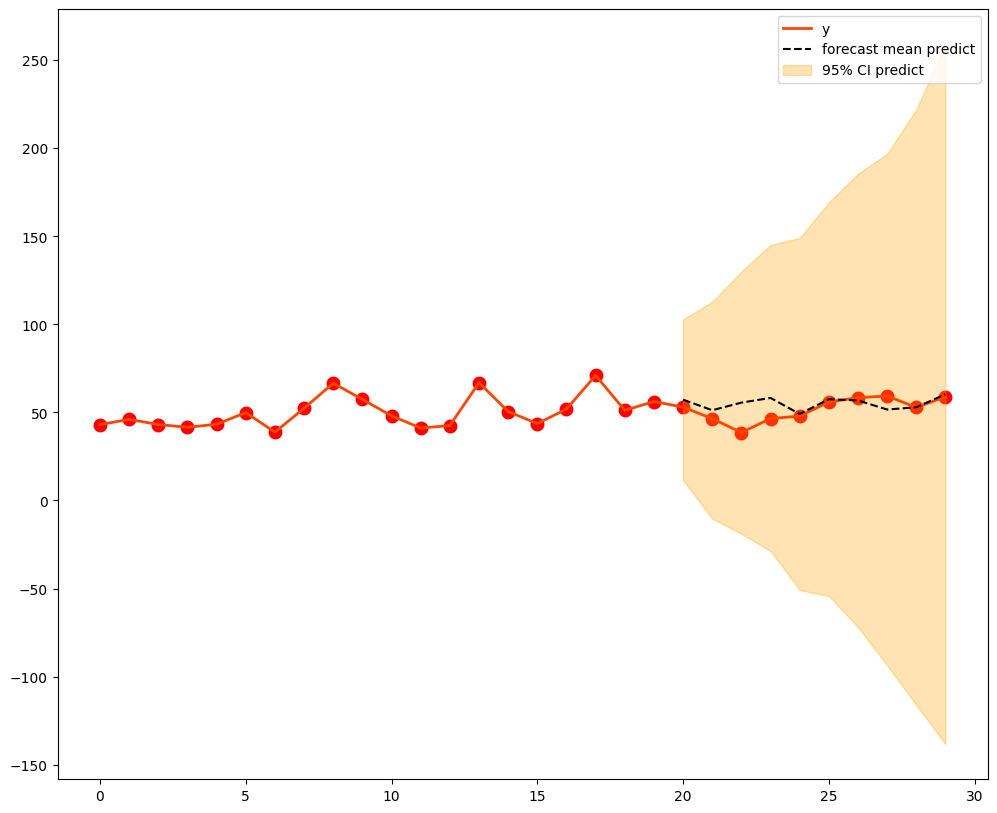

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
import tensorflow as tf
np.random.seed(1)
x = np.random.normal(2000,200,30)#np.random.rand(30)
y = np.random.normal(50,10,30) #2.2 * x + np.random.rand(30)
data = pd.DataFrame({'X': x, 'y': y}, dtype=np.float32)
obs_data = data['y'].iloc[:20]

level = tfp.sts.LocalLevel(observed_time_series=obs_data) # y_train 20
linear = tfp.sts.LinearRegression(design_matrix=data['X'].values[:, np.newaxis]) #X_all 30
day_of_week = tfp.sts.Seasonal(
      num_seasons=3,
      observed_time_series=obs_data,
      name='day_of_week')
component = tfp.sts.SmoothSeasonal(
    period=3,
    frequency_multipliers=[1, 2, 3]
)
ar = tfp.sts.Autoregressive(
    4
)
# season = tfp.sts.SmoothSeasonal(
#     period=3,
#     frequency_multipliers=[1, 2, 3]
#     # initial_state_prior=tfd.MultivariateNormalDiag(scale_diag=tf.ones([6])),
# )
model = tfp.sts.Sum([level, linear,day_of_week,component,ar], observed_time_series=obs_data) #train_y 20

samples, _ = tfp.sts.fit_with_hmc(model, obs_data,num_results=100,num_warmup_steps=100,variational_optimizer=None) #train_y 20

dist = tfp.sts.forecast(model, obs_data, samples, 10)
mean, std = dist.mean(), dist.stddev()

fig = plt.figure(figsize=(12, 10))
ax = plt.subplot(1, 1 ,1)
# ax.plot(np.arange(30), data['X'], label='X', lw=1)
ax.plot(np.arange(30), data['y'], label='y', lw=2, color='orangered')
ax.scatter(np.arange(30), data['y'], lw=4, color='red')
ax.plot(np.arange(20, 30), mean, color='k', ls='--', label='forecast mean predict')
ax.fill_between(np.arange(20, 30), np.squeeze(mean - 1.96 * std),
                np.squeeze(mean + 1.96 * std), color='orange', alpha=0.3,
                label='95% CI predict')
plt.legend(loc='best')

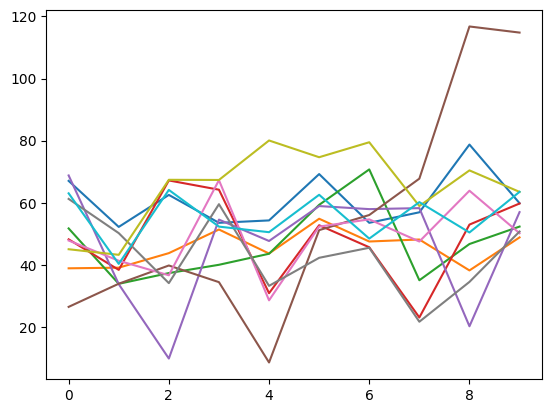

In [ ]:
forecast_samples = dist.sample(10)
for i in forecast_samples:
    plt.plot(i)
plt.show()

In [ ]:
import numpy as np

# Создание массива с измерением размера 1
arr = np.array([[[1, 2, 3]]])
print("Исходный массив:")
print(arr)
print("Размерность исходного массива:", arr.shape)

# Использование np.squeeze для удаления измерения размера 1
arr_squeezed = np.squeeze(arr)
print("\nМассив после применения np.squeeze:")
print(arr_squeezed)
print("Размерность массива после применения np.squeeze:", arr_squeezed.shape)

Исходный массив:
[[[1 2 3]]]
Размерность исходного массива: (1, 1, 3)

Массив после применения np.squeeze:
[1 2 3]
Размерность массива после применения np.squeeze: (3,)


In [ ]:
import numpy as np

holiday_indicators = np.zeros([31, 3])
holiday_indicators[23, 0] = 1  # Christmas Eve
holiday_indicators[24, 1] = 1  # Christmas Day
holiday_indicators[30, 2] = 1  # New Year's Eve
holiday_indicators

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 1.]])

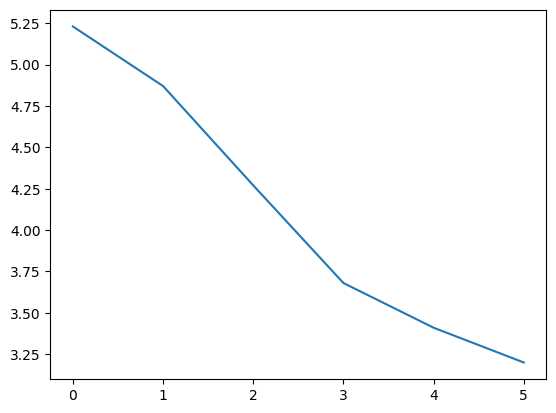

In [2]:
import numpy as np
import matplotlib.pyplot as plt

prop = np.array([5.23,4.87,4.27,3.68,3.41,3.20])
plt.plot(prop)